To classify whteher the person has affair or not

In [32]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

#logistic regression Library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [43]:
df = pd.read_csv("G://Github//DS-assignments-python//Logistic Regression//affairs.csv")

In [4]:
df.head(5)

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.00,no,3,18,7,4
1,0,female,27.0,4.00,no,4,14,6,4
2,0,female,32.0,15.00,yes,1,12,1,4
3,0,male,57.0,15.00,yes,5,18,6,5
4,0,male,22.0,0.75,no,2,17,6,3


In [5]:
df["affairs"].unique()

array([ 0,  3,  7, 12,  1,  2], dtype=int64)

In [6]:
df.nunique()

affairs          6
gender           2
age              9
yearsmarried     8
children         2
religiousness    5
education        7
occupation       7
rating           5
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   affairs        601 non-null    int64  
 1   gender         601 non-null    object 
 2   age            601 non-null    float64
 3   yearsmarried   601 non-null    float64
 4   children       601 non-null    object 
 5   religiousness  601 non-null    int64  
 6   education      601 non-null    int64  
 7   occupation     601 non-null    int64  
 8   rating         601 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 42.4+ KB


In [8]:
df.isnull().sum()

affairs          0
gender           0
age              0
yearsmarried     0
children         0
religiousness    0
education        0
occupation       0
rating           0
dtype: int64


### Data Exploration

In [9]:
num_col = [i for i in df.columns if df[i].dtype != "O"]
char_col = [i for i in df.columns if df[i].dtype == "O"]

#### univariate analysis

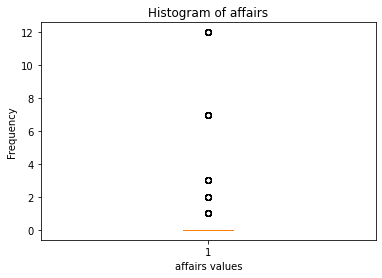

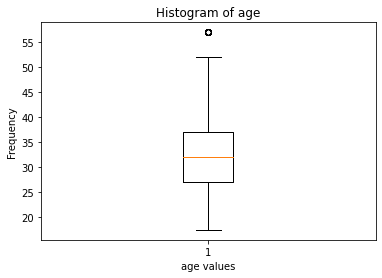

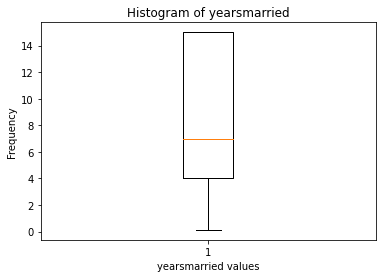

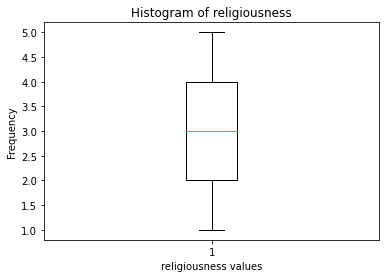

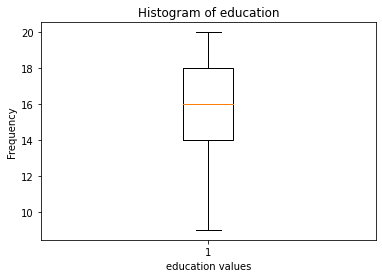

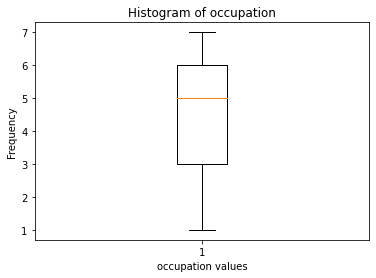

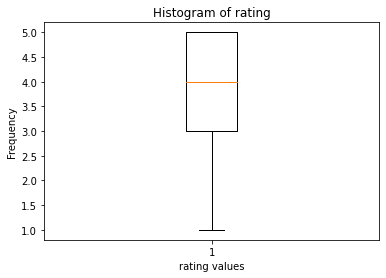

In [10]:
for i in num_col:
    plt.figure()
    plt.xlabel(i + " values")
    plt.ylabel("Frequency")
    plt.title("Histogram of " + i)
    plt.boxplot(df[i])
    plt.show()

Affairs have high ammount ouf outliers

#### bivariate and univriate analysis in one

In [11]:
num_index = [i for i in range(9) if df.iloc[:,i].dtype != "O" ]

In [12]:
#num_index

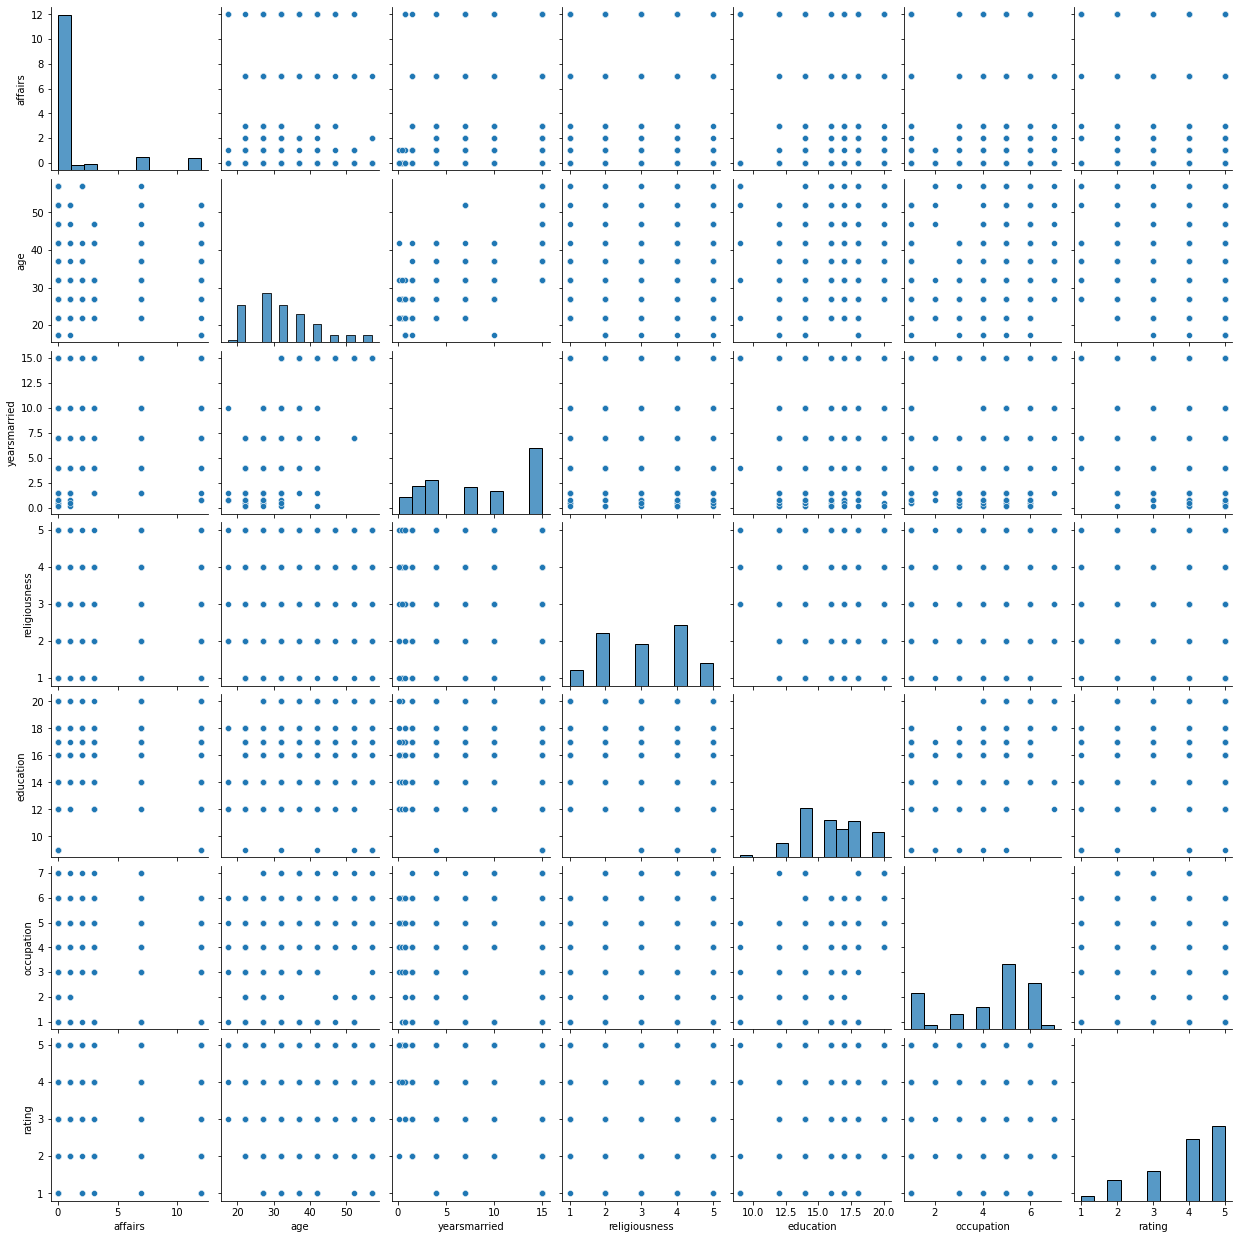

In [13]:
sns.pairplot(df.iloc[:,num_index])

the plot shows their no linearity but Affairs is highly skewed due to outliers

<AxesSubplot:xlabel='gender'>

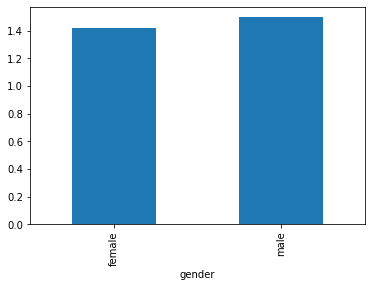

In [14]:
df.groupby('gender')['affairs'].mean().plot.bar()

<AxesSubplot:xlabel='affairs'>

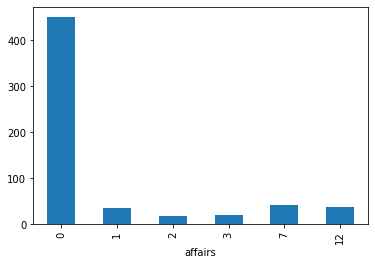

In [15]:
# plotting value vise frequency
df.groupby(['affairs']).size().plot(kind = "bar")

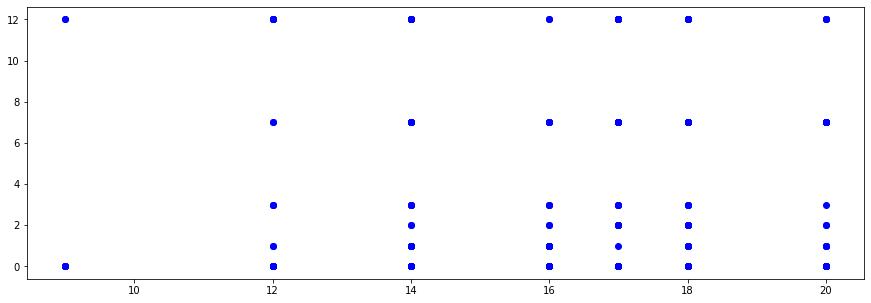

In [19]:
plt.figure(figsize = (15,5))
plt.plot(df["education"],df["affairs"],"bo")

### the outlier value doesn't needed to be fixed as ammount of 0 affairs will be high generally

In [27]:
#count of unique values of affair
df["affairs"].value_counts()

0     451
7      42
12     38
1      34
3      19
2      17
Name: affairs, dtype: int64

In [28]:
df[df["affairs"]>0].count()

affairs          150
gender           150
age              150
yearsmarried     150
children         150
religiousness    150
education        150
occupation       150
rating           150
dtype: int64

In [29]:
451/600

0.7516666666666667

#converting output variable into categorical


In [39]:
dfx = df

In [40]:
dfx["affairs"] = pd.Series(np.where(df["affairs"]>0,1,0)) 

In [42]:
dfx["affairs"].value_counts()

0    451
1    150
Name: affairs, dtype: int64

75% of data is no affair. Data seems unbalanced

#### lets try with imbalanced data first and later with balanced data
#### We will do a imbalanced model test only on minority class to see if the model works fine or not

In [44]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   affairs        601 non-null    int32  
 1   gender         601 non-null    object 
 2   age            601 non-null    float64
 3   yearsmarried   601 non-null    float64
 4   children       601 non-null    object 
 5   religiousness  601 non-null    int64  
 6   education      601 non-null    int64  
 7   occupation     601 non-null    int64  
 8   rating         601 non-null    int64  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 40.0+ KB


In [47]:
dfx.columns

Index(['affairs', 'gender', 'age', 'yearsmarried', 'children', 'religiousness',
       'education', 'occupation', 'rating'],
      dtype='object')

In [48]:
dfd = pd.get_dummies(dfx , columns = ["gender","children"],drop_first  = True )

In [49]:
dfd.head(5)

,affairs,age,yearsmarried,religiousness,education,occupation,rating,gender_male,children_yes
0,0,37.0,10.00,3,18,7,4,1,0
1,0,27.0,4.00,4,14,6,4,0,0
2,0,32.0,15.00,1,12,1,4,0,1
3,0,57.0,15.00,5,18,6,5,1,1
4,0,22.0,0.75,2,17,6,3,1,0


In [50]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   affairs        601 non-null    int32  
 1   age            601 non-null    float64
 2   yearsmarried   601 non-null    float64
 3   religiousness  601 non-null    int64  
 4   education      601 non-null    int64  
 5   occupation     601 non-null    int64  
 6   rating         601 non-null    int64  
 7   gender_male    601 non-null    uint8  
 8   children_yes   601 non-null    uint8  
dtypes: float64(2), int32(1), int64(4), uint8(2)
memory usage: 31.8 KB


In [51]:
#splitting in train and test
dfd_x = dfd.iloc[:,1:]
dfd_y = dfd.iloc[:,0]

In [ ]:
dfd_tr_x,dfd_tr_y,dfd_ts_x,dfd_ts_y = train_test_spliy(dfd,test= )

Creating the logistic model


class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

default penalty is l2
fit_interceptbool, default=True
- Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
max_iterint, default=100
Maximum number of iterations taken for the solvers to converge.

In [ ]:
mark1 = LogisticRegression()